# Imports

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
import random as rn
import seaborn as sb
sb.set_style(style="whitegrid")
sb.set_color_codes()
import scipy.ndimage
from scipy.interpolate import griddata
import numpy.ma as ma
from numpy.random import uniform, seed
from google.colab import files

# Single Blob

## Data Preparation


### Data Generation

In [2]:
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance
Nobjs = 500
np.random.seed(1)
x, y = np.random.multivariate_normal(mean, cov, Nobjs).T
#Add manual outlier
x[0]=3.3
y[0]=3.3
X=np.array([x,y]).T

### Data Visualisation

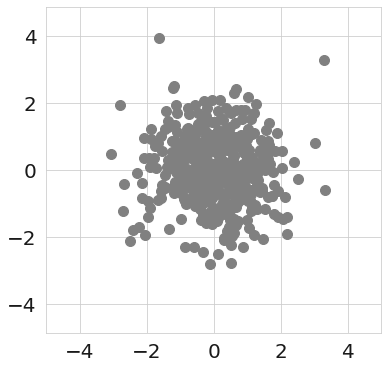

In [3]:
fig=plt.figure(figsize=(6,6))
fig.add_subplot(111)
plt.plot(X[:,0],X[:,1],'o', markersize=10, color=[0.5,0.5,0.5])
plt.grid("off")
plt.axis("equal")
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.tick_params(direction='out', length=6, width=2, colors='k',labelsize=20)
plt.show()

### Saving in csv 

In [4]:
label=np.zeros(500, int)
label[0]=1

dict={'1':x, '2':y, 'label':label}
df=pd.DataFrame(dict)

df.to_csv('SingleBlob.csv', sep='\t')
files.download("SingleBlob.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Train iForest on Data

This process is done on local machine.

## Obtain Anomaly Scores

In [5]:
files.upload()
files.upload()

Saving SingleBlob_tested_over_SingleBlob_exlevel_0.csv to SingleBlob_tested_over_SingleBlob_exlevel_0.csv


Saving SingleBlob_tested_over_SingleBlob_exlevel_1.csv to SingleBlob_tested_over_SingleBlob_exlevel_1.csv


{'SingleBlob_tested_over_SingleBlob_exlevel_1.csv': b'pointId Ascore actuallabel\n0 0.746879 1\n1 0.434107 0\n2 0.567324 0\n3 0.490413 0\n4 0.398279 0\n5 0.581758 0\n6 0.407128 0\n7 0.459649 0\n8 0.414925 0\n9 0.413179 0\n10 0.466337 0\n11 0.426601 0\n12 0.420447 0\n13 0.419014 0\n14 0.40714 0\n15 0.413179 0\n16 0.434101 0\n17 0.406008 0\n18 0.429318 0\n19 0.48664 0\n20 0.415949 0\n21 0.493929 0\n22 0.411226 0\n23 0.52256 0\n24 0.413226 0\n25 0.400617 0\n26 0.430555 0\n27 0.411022 0\n28 0.439225 0\n29 0.41688 0\n30 0.451481 0\n31 0.399797 0\n32 0.401201 0\n33 0.500941 0\n34 0.566197 0\n35 0.467375 0\n36 0.414861 0\n37 0.525059 0\n38 0.417557 0\n39 0.412255 0\n40 0.396033 0\n41 0.40852 0\n42 0.400564 0\n43 0.415424 0\n44 0.431152 0\n45 0.434707 0\n46 0.412029 0\n47 0.402387 0\n48 0.399858 0\n49 0.418923 0\n50 0.436472 0\n51 0.417407 0\n52 0.42844 0\n53 0.426491 0\n54 0.39837 0\n55 0.451267 0\n56 0.424771 0\n57 0.440622 0\n58 0.468536 0\n59 0.432702 0\n60 0.411386 0\n61 0.549136 0\n62 0.

In [7]:
data = pd.read_csv("SingleBlob_tested_over_SingleBlob_exlevel_0.csv", delimiter=' ')
S0 = data['Ascore'].to_numpy()

data = pd.read_csv("SingleBlob_tested_over_SingleBlob_exlevel_1.csv", delimiter=' ')
S1 = data['Ascore'].to_numpy()

print(np.min(S0))
print(np.max(S0))

0.400257
0.783197


### Visualise scores

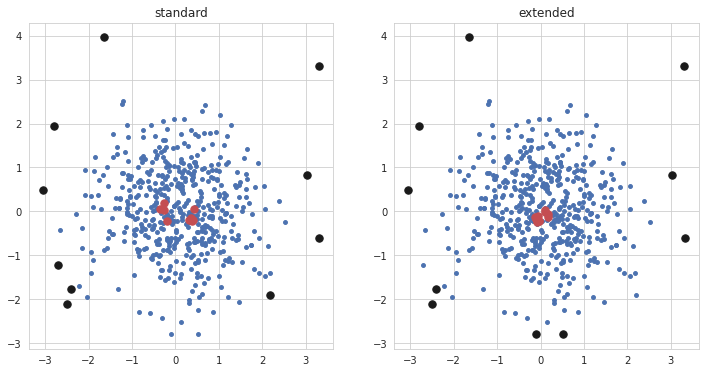

In [8]:
ss0=np.argsort(S0)
ss1=np.argsort(S1)

f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x,y,s=15,c='b',edgecolor='b')
plt.scatter(x[ss0[-10:]],y[ss0[-10:]],s=55,c='k')
plt.scatter(x[ss0[:10]],y[ss0[:10]],s=55,c='r')
plt.title('standard')

plt.subplot(1,2,2)
plt.scatter(x,y,s=15,c='b',edgecolor='b')
plt.scatter(x[ss1[-10:]],y[ss1[-10:]],s=55,c='k')
plt.scatter(x[ss1[:10]],y[ss1[:10]],s=55,c='r')
plt.title('extended')
plt.show()

# print(ss0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


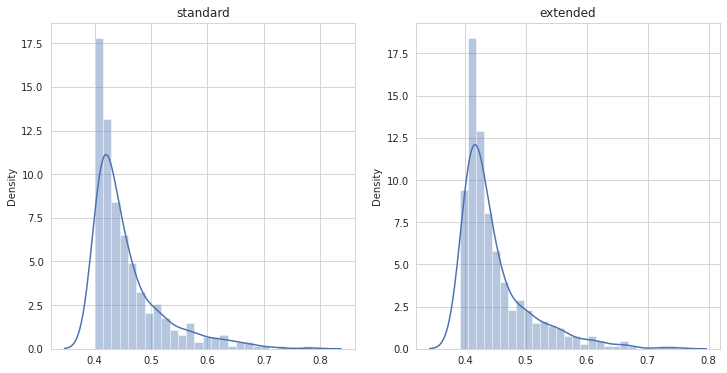

In [9]:
f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.distplot(S0, kde=True, color="b")
plt.title('standard')

plt.subplot(1,2,2)
sb.distplot(S1, kde=True, color="b")
plt.title('extended')
plt.show()

## Score Maps

In [10]:
xx, yy = np.meshgrid(np.linspace(-5., 5., 30), np.linspace(-5., 5, 30))
X_in=np.c_[xx.ravel(), yy.ravel()]

label=np.zeros(900, int)

dict={'1':X_in[:, 0], '2':X_in[:, 1], 'label':label}
df=pd.DataFrame(dict)

df.to_csv('SingleBlob_heatmap.csv', sep='\t')
files.download("SingleBlob_heatmap.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
files.upload()
files.upload()



Saving SingleBlob_heatmap_tested_over_SingleBlob_exlevel_0.csv to SingleBlob_heatmap_tested_over_SingleBlob_exlevel_0.csv


Saving SingleBlob_heatmap_tested_over_SingleBlob_exlevel_1.csv to SingleBlob_heatmap_tested_over_SingleBlob_exlevel_1.csv


{'SingleBlob_heatmap_tested_over_SingleBlob_exlevel_1.csv': b'pointId Ascore actuallabel\n0 0.704411 0\n1 0.707857 0\n2 0.706966 0\n3 0.707562 0\n4 0.709537 0\n5 0.702382 0\n6 0.702276 0\n7 0.701707 0\n8 0.696726 0\n9 0.692768 0\n10 0.691484 0\n11 0.692633 0\n12 0.68978 0\n13 0.69599 0\n14 0.688961 0\n15 0.691289 0\n16 0.690713 0\n17 0.691439 0\n18 0.689449 0\n19 0.695817 0\n20 0.691489 0\n21 0.685488 0\n22 0.688793 0\n23 0.697197 0\n24 0.703974 0\n25 0.704833 0\n26 0.713668 0\n27 0.715781 0\n28 0.72085 0\n29 0.723235 0\n30 0.699459 0\n31 0.701974 0\n32 0.706075 0\n33 0.706398 0\n34 0.707554 0\n35 0.699981 0\n36 0.697805 0\n37 0.697542 0\n38 0.691528 0\n39 0.693946 0\n40 0.691149 0\n41 0.687426 0\n42 0.68771 0\n43 0.690632 0\n44 0.683193 0\n45 0.683282 0\n46 0.686255 0\n47 0.685504 0\n48 0.686342 0\n49 0.686424 0\n50 0.686152 0\n51 0.684409 0\n52 0.686279 0\n53 0.697487 0\n54 0.703836 0\n55 0.712049 0\n56 0.715967 0\n57 0.71556 0\n58 0.722535 0\n59 0.720706 0\n60 0.706642 0\n61 0.69857

In [12]:
data = pd.read_csv("SingleBlob_heatmap_tested_over_SingleBlob_exlevel_0.csv", delimiter=' ')
S0 = data['Ascore'].to_numpy()
S0 = S0.reshape(xx.shape)

data = pd.read_csv("SingleBlob_heatmap_tested_over_SingleBlob_exlevel_1.csv", delimiter=' ')
S1 = data['Ascore'].to_numpy()
S1 = S1.reshape(xx.shape)

print(np.min(S0))
print(np.max(S0))

0.40543
0.795555


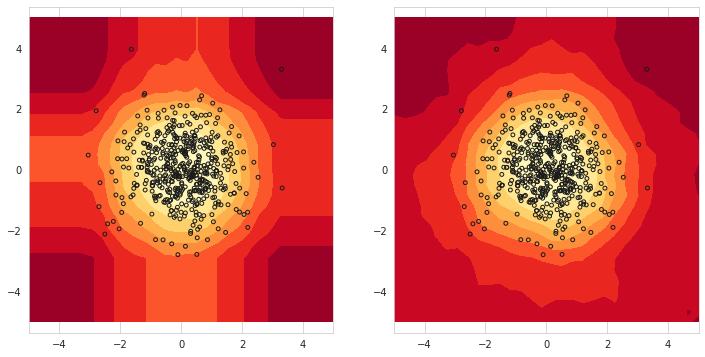

In [13]:
f = plt.figure(figsize=(12,6))

ax1 = f.add_subplot(121)
levels = np.linspace(np.min(S0),np.max(S0),10)
CS = ax1.contourf(xx, yy, S0, levels, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')
plt.axis("equal")


ax2 = f.add_subplot(122)
levels = np.linspace(np.min(S1),np.max(S1),10)
CS = ax2.contourf(xx, yy, S1, levels, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')
plt.axis("equal")


plt.show()

# Multiple Blobs

## Data Preparation

### Data Generation

In [14]:
mean1 = [10, 0]
cov1 = [[1, 0], [0, 1]]  

mean2 = [0, 10]
cov2 = [[1, 0], [0, 1]]

Nobjs = 500          # Size of dataset.
np.random.seed(1)    # Add this for repeatablilty of the experiment. 

x1, y1 = np.random.multivariate_normal(mean1, cov1, int(Nobjs/2)).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, int(Nobjs/2)).T

# join the two clusters so as to make one dataset. 
x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))
X=np.array([x,y]).T

### Data Visualisation

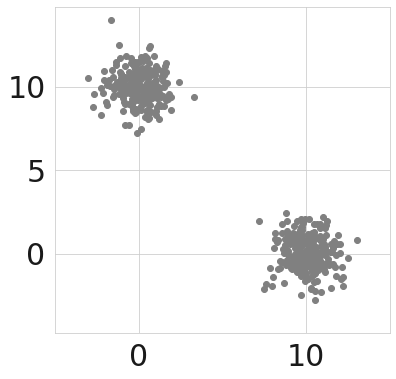

In [15]:
fig=plt.figure(figsize=(6,6))
fig.add_subplot(111)
plt.plot(X[:,0],X[:,1],'o', color=[0.5,0.5,0.5])
plt.grid("off")
plt.axis("equal")

plt.xlim([-5,15])
plt.ylim([-5,15])
plt.tick_params(direction='out', length=6, width=2, colors='k',labelsize=30)

plt.show()

### Save in csv


In [16]:
label=np.zeros(500, int)
label[0]=1

dict={'1':x, '2':y, 'label':label}
df=pd.DataFrame(dict)

df.to_csv('MultipleBlob.csv', sep='\t')
files.download("MultipleBlob.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Train iForest on Data

This part is done on local machine

## Obtain Anomaly Scores

In [17]:
files.upload()
files.upload()

Saving MultipleBlob_tested_over_MultipleBlob_exlevel_0.csv to MultipleBlob_tested_over_MultipleBlob_exlevel_0.csv


Saving MultipleBlob_tested_over_MultipleBlob_exlevel_1.csv to MultipleBlob_tested_over_MultipleBlob_exlevel_1.csv


{'MultipleBlob_tested_over_MultipleBlob_exlevel_1.csv': b'pointId Ascore actuallabel\n0 0.507757 1\n1 0.468645 0\n2 0.568972 0\n3 0.520193 0\n4 0.422135 0\n5 0.579088 0\n6 0.428689 0\n7 0.504723 0\n8 0.43915 0\n9 0.425049 0\n10 0.464183 0\n11 0.456114 0\n12 0.450172 0\n13 0.444769 0\n14 0.42875 0\n15 0.446503 0\n16 0.463639 0\n17 0.437618 0\n18 0.455902 0\n19 0.515134 0\n20 0.440567 0\n21 0.481053 0\n22 0.427136 0\n23 0.541608 0\n24 0.430299 0\n25 0.422947 0\n26 0.4675 0\n27 0.430797 0\n28 0.458436 0\n29 0.441269 0\n30 0.456208 0\n31 0.424038 0\n32 0.424561 0\n33 0.510237 0\n34 0.590809 0\n35 0.492855 0\n36 0.439246 0\n37 0.528454 0\n38 0.436937 0\n39 0.435687 0\n40 0.422095 0\n41 0.428453 0\n42 0.423017 0\n43 0.431817 0\n44 0.447263 0\n45 0.464377 0\n46 0.437784 0\n47 0.425648 0\n48 0.422578 0\n49 0.438094 0\n50 0.450849 0\n51 0.430968 0\n52 0.454759 0\n53 0.4639 0\n54 0.422633 0\n55 0.477634 0\n56 0.463009 0\n57 0.472348 0\n58 0.50025 0\n59 0.46309 0\n60 0.436136 0\n61 0.548887 0\n62

In [18]:
data = pd.read_csv("MultipleBlob_tested_over_MultipleBlob_exlevel_0.csv", delimiter=' ')
S0 = data['Ascore'].to_numpy()

data = pd.read_csv("MultipleBlob_tested_over_MultipleBlob_exlevel_1.csv", delimiter=' ')
S1 = data['Ascore'].to_numpy()

print(S0)
print(S0)

[0.520271 0.47204  0.596408 0.541374 0.433841 0.611207 0.439416 0.503695
 0.451019 0.430441 0.475156 0.448062 0.459673 0.452025 0.438198 0.447908
 0.458414 0.442618 0.452166 0.523471 0.450744 0.502081 0.437323 0.538451
 0.432445 0.433993 0.464058 0.43574  0.455048 0.43788  0.467686 0.436617
 0.432844 0.524189 0.610093 0.488844 0.439444 0.544414 0.444388 0.439529
 0.43074  0.429808 0.43093  0.443129 0.451143 0.468483 0.443765 0.433952
 0.430397 0.449243 0.461905 0.434825 0.453789 0.470837 0.429751 0.477513
 0.468885 0.476198 0.508065 0.460661 0.440403 0.569552 0.552787 0.509833
 0.465776 0.439475 0.465518 0.457195 0.467346 0.441538 0.426107 0.455242
 0.434885 0.432216 0.436944 0.587059 0.572153 0.432024 0.428557 0.467226
 0.467952 0.432476 0.433744 0.452574 0.642672 0.453385 0.616258 0.432006
 0.492798 0.443551 0.463337 0.465032 0.439419 0.432648 0.426911 0.466067
 0.574025 0.510151 0.437245 0.458731 0.441734 0.522852 0.566332 0.527729
 0.537311 0.492979 0.472942 0.469343 0.439579 0.489

### Visualise Scores

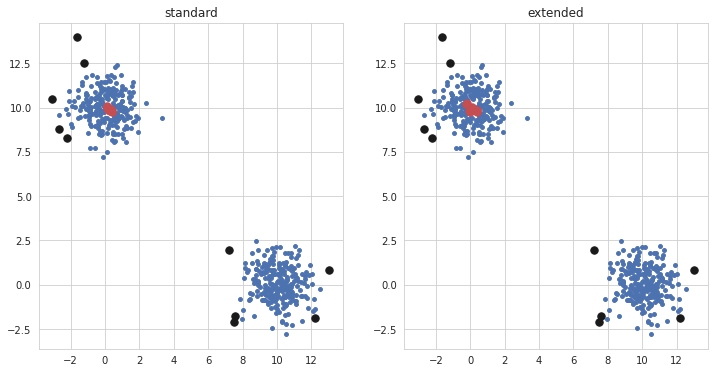

In [19]:
ss0=np.argsort(S0)
ss1=np.argsort(S1)

f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x,y,s=15,c='b',edgecolor='b')
plt.scatter(x[ss0[-10:]],y[ss0[-10:]],s=55,c='k')
plt.scatter(x[ss0[:10]],y[ss0[:10]],s=55,c='r')
plt.title('standard')

plt.subplot(1,2,2)
plt.scatter(x,y,s=15,c='b',edgecolor='b')
plt.scatter(x[ss1[-10:]],y[ss1[-10:]],s=55,c='k')
plt.scatter(x[ss1[:10]],y[ss1[:10]],s=55,c='r')
plt.title('extended')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


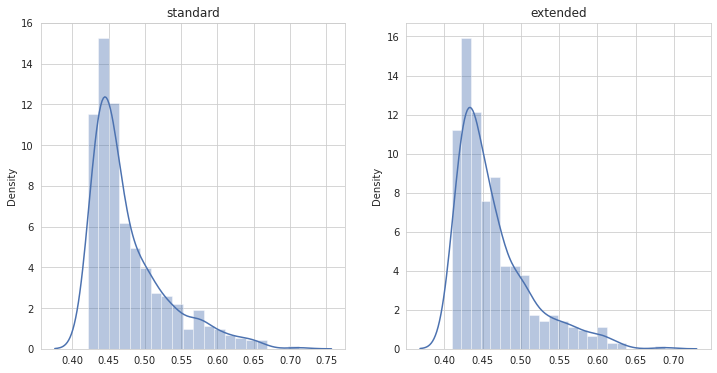

In [20]:
f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.distplot(S0, kde=True, color="b")
plt.title('standard')

plt.subplot(1,2,2)
sb.distplot(S1, kde=True, color="b")
plt.title('extended')
plt.show()

## Score Map

In [21]:
xx, yy = np.meshgrid(np.linspace(-5, 15, 30), np.linspace(-5, 15, 30))
X_in=np.c_[xx.ravel(), yy.ravel()]

label=np.zeros(900, int)

dict={'1':X_in[:, 0], '2':X_in[:, 1], 'label':label}
df=pd.DataFrame(dict)

df.to_csv('MultipleBlob_heatmap.csv', sep='\t')
files.download("MultipleBlob_heatmap.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
files.upload()
files.upload()

Saving MultipleBlob_heatmap_tested_over_MultipleBlob_exlevel_0.csv to MultipleBlob_heatmap_tested_over_MultipleBlob_exlevel_0.csv


Saving MultipleBlob_heatmap_tested_over_MultipleBlob_exlevel_1.csv to MultipleBlob_heatmap_tested_over_MultipleBlob_exlevel_1.csv


{'MultipleBlob_heatmap_tested_over_MultipleBlob_exlevel_1.csv': b'pointId Ascore actuallabel\n0 0.730482 0\n1 0.731403 0\n2 0.728757 0\n3 0.731036 0\n4 0.729001 0\n5 0.730929 0\n6 0.726934 0\n7 0.722032 0\n8 0.71848 0\n9 0.71629 0\n10 0.711511 0\n11 0.713312 0\n12 0.709397 0\n13 0.707429 0\n14 0.701459 0\n15 0.694418 0\n16 0.686153 0\n17 0.684576 0\n18 0.678087 0\n19 0.67369 0\n20 0.667733 0\n21 0.661921 0\n22 0.659088 0\n23 0.668613 0\n24 0.67536 0\n25 0.677674 0\n26 0.680828 0\n27 0.674734 0\n28 0.677334 0\n29 0.687927 0\n30 0.728119 0\n31 0.729792 0\n32 0.730201 0\n33 0.728777 0\n34 0.728881 0\n35 0.73162 0\n36 0.728636 0\n37 0.723928 0\n38 0.720781 0\n39 0.71651 0\n40 0.711985 0\n41 0.706921 0\n42 0.703091 0\n43 0.698223 0\n44 0.698402 0\n45 0.690807 0\n46 0.681965 0\n47 0.679468 0\n48 0.677123 0\n49 0.667773 0\n50 0.661988 0\n51 0.654117 0\n52 0.648174 0\n53 0.662934 0\n54 0.670788 0\n55 0.673483 0\n56 0.668313 0\n57 0.67463 0\n58 0.682809 0\n59 0.67911 0\n60 0.725438 0\n61 0.7252

In [23]:
data = pd.read_csv("MultipleBlob_heatmap_tested_over_MultipleBlob_exlevel_0.csv", delimiter=' ')
S0 = data['Ascore'].to_numpy()
S0 = S0.reshape(xx.shape)

data = pd.read_csv("MultipleBlob_heatmap_tested_over_MultipleBlob_exlevel_1.csv", delimiter=' ')
S1 = data['Ascore'].to_numpy()
S1 = S1.reshape(xx.shape)

print(np.min(S0))
print(np.max(S0))

0.421384
0.756593


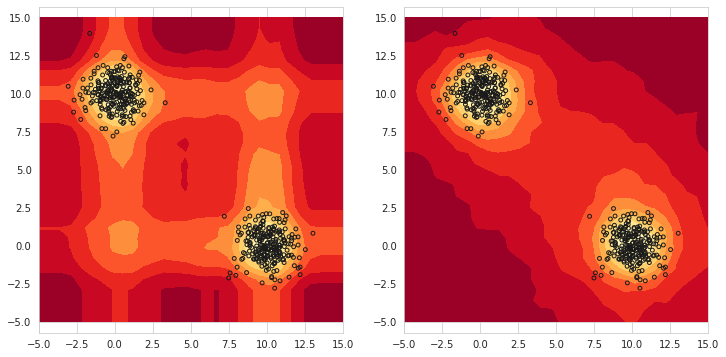

In [24]:
f = plt.figure(figsize=(12,6))

ax1 = f.add_subplot(121)
levels = np.linspace(np.min(S0),np.max(S0),10)
CS = ax1.contourf(xx, yy, S0, levels, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')
plt.axis("equal")


ax2 = f.add_subplot(122)
levels = np.linspace(np.min(S1),np.max(S1),10)
CS = ax2.contourf(xx, yy, S1, levels, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')
plt.axis("equal")


plt.show()

# Sinusoidal Data

## Data Preparation

### Data Generation

In [25]:
N = 1000
x = np.random.rand(N)*8*np.pi
y = np.sin(x) + np.random.randn(N)/4.
X=np.array([x,y]).T

### Data Visualisation

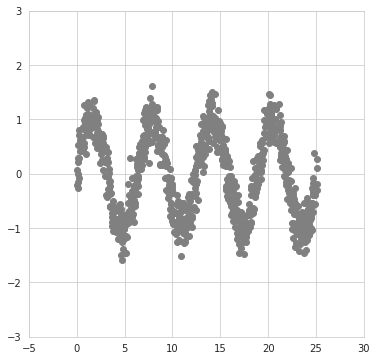

In [26]:
fig=plt.figure(figsize=(6,6))
fig.add_subplot(111)
plt.plot(X[:,0],X[:,1],'o', color=[0.5,0.5,0.5])

plt.xlim([-5,30])
plt.ylim([-3.,3.])

plt.show()

### Save to csv

In [27]:
label=np.zeros(1000, int)
label[0]=1

dict={'1':x, '2':y, 'label':label}
df=pd.DataFrame(dict)

df.to_csv('Sinusoidal.csv', sep='\t')
files.download("Sinusoidal.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Train iForest

This process is done on local machine.

## Obtain Anomaly scores

In [28]:
files.upload()
files.upload()

Saving Sinusoidal_tested_over_Sinusoidal_exlevel_0.csv to Sinusoidal_tested_over_Sinusoidal_exlevel_0.csv


Saving Sinusoidal_tested_over_Sinusoidal_exlevel_1.csv to Sinusoidal_tested_over_Sinusoidal_exlevel_1.csv


{'Sinusoidal_tested_over_Sinusoidal_exlevel_1.csv': b'pointId Ascore actuallabel\n0 0.500737 1\n1 0.484208 0\n2 0.483668 0\n3 0.501414 0\n4 0.488798 0\n5 0.480602 0\n6 0.493558 0\n7 0.477294 0\n8 0.533968 0\n9 0.514546 0\n10 0.493217 0\n11 0.467629 0\n12 0.485134 0\n13 0.465082 0\n14 0.477294 0\n15 0.49438 0\n16 0.560275 0\n17 0.502883 0\n18 0.488093 0\n19 0.488726 0\n20 0.475182 0\n21 0.468325 0\n22 0.489266 0\n23 0.492289 0\n24 0.533159 0\n25 0.475636 0\n26 0.552089 0\n27 0.502739 0\n28 0.479939 0\n29 0.463783 0\n30 0.474995 0\n31 0.591243 0\n32 0.471067 0\n33 0.487905 0\n34 0.49416 0\n35 0.490382 0\n36 0.481093 0\n37 0.50963 0\n38 0.550595 0\n39 0.505987 0\n40 0.489578 0\n41 0.530884 0\n42 0.493173 0\n43 0.492289 0\n44 0.486803 0\n45 0.470002 0\n46 0.493716 0\n47 0.521593 0\n48 0.462942 0\n49 0.49531 0\n50 0.464252 0\n51 0.523561 0\n52 0.495065 0\n53 0.495522 0\n54 0.492308 0\n55 0.465509 0\n56 0.497559 0\n57 0.472154 0\n58 0.522629 0\n59 0.529164 0\n60 0.501036 0\n61 0.502044 0\n62

In [29]:
data = pd.read_csv("Sinusoidal_tested_over_Sinusoidal_exlevel_0.csv", delimiter=' ')
S0 = data['Ascore'].to_numpy()

data = pd.read_csv("Sinusoidal_tested_over_Sinusoidal_exlevel_1.csv", delimiter=' ')
S1 = data['Ascore'].to_numpy()

print(np.min(S0))
print(np.max(S0))

0.455226
0.645964


### Visualise Scores

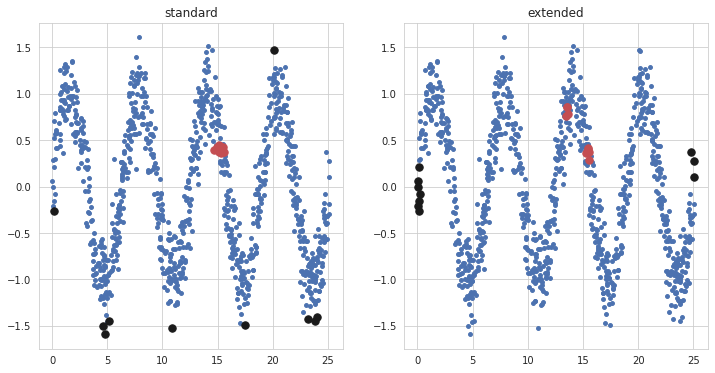

In [30]:
ss0=np.argsort(S0)
ss1=np.argsort(S1)

f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x,y,s=15,c='b',edgecolor='b')
plt.scatter(x[ss0[-10:]],y[ss0[-10:]],s=55,c='k')
plt.scatter(x[ss0[:10]],y[ss0[:10]],s=55,c='r')
plt.title('standard')

plt.subplot(1,2,2)
plt.scatter(x,y,s=15,c='b',edgecolor='b')
plt.scatter(x[ss1[-10:]],y[ss1[-10:]],s=55,c='k')
plt.scatter(x[ss1[:10]],y[ss1[:10]],s=55,c='r')
plt.title('extended')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


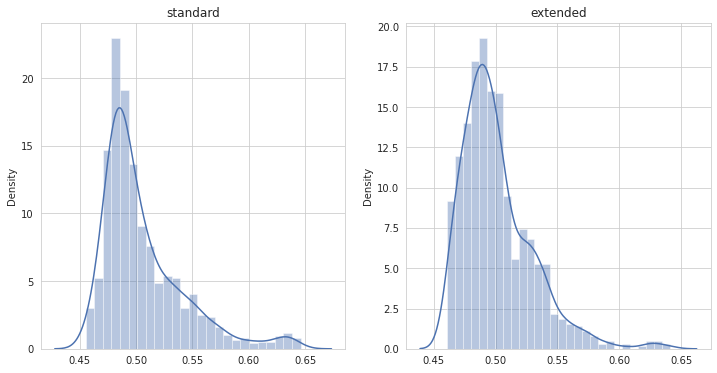

In [31]:
f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.distplot(S0, kde=True, color="b")
plt.title('standard')

plt.subplot(1,2,2)
sb.distplot(S1, kde=True, color="b")
plt.title('extended')
plt.show()

## Score Maps

In [32]:
xx, yy = np.meshgrid(np.linspace(-5, 30, 30), np.linspace(-3, 3, 30))
X_in=np.c_[xx.ravel(), yy.ravel()]

label=np.zeros(900, int)

dict={'1':X_in[:, 0], '2':X_in[:, 1], 'label':label}
df=pd.DataFrame(dict)

df.to_csv('Sinusoidal_heatmap.csv', sep='\t')
files.download("Sinusoidal_heatmap.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
files.upload()
files.upload()

Saving Sinusoidal_heatmap_tested_over_Sinusoidal_exlevel_0.csv to Sinusoidal_heatmap_tested_over_Sinusoidal_exlevel_0.csv


Saving Sinusoidal_heatmap_tested_over_Sinusoidal_exlevel_1.csv to Sinusoidal_heatmap_tested_over_Sinusoidal_exlevel_1.csv


{'Sinusoidal_heatmap_tested_over_Sinusoidal_exlevel_1.csv': b'pointId Ascore actuallabel\n0 0.673122 0\n1 0.670612 0\n2 0.672609 0\n3 0.670219 0\n4 0.661837 0\n5 0.652759 0\n6 0.638768 0\n7 0.636011 0\n8 0.625618 0\n9 0.623374 0\n10 0.622484 0\n11 0.614574 0\n12 0.597298 0\n13 0.583644 0\n14 0.587058 0\n15 0.587821 0\n16 0.597989 0\n17 0.586749 0\n18 0.590814 0\n19 0.590428 0\n20 0.594793 0\n21 0.601841 0\n22 0.605102 0\n23 0.605337 0\n24 0.620546 0\n25 0.630204 0\n26 0.638792 0\n27 0.6438 0\n28 0.650389 0\n29 0.653617 0\n30 0.671434 0\n31 0.669475 0\n32 0.66912 0\n33 0.671708 0\n34 0.661012 0\n35 0.649341 0\n36 0.642322 0\n37 0.631163 0\n38 0.617201 0\n39 0.620297 0\n40 0.611839 0\n41 0.603536 0\n42 0.591316 0\n43 0.578473 0\n44 0.584273 0\n45 0.580074 0\n46 0.596117 0\n47 0.585173 0\n48 0.587094 0\n49 0.584003 0\n50 0.595222 0\n51 0.603644 0\n52 0.603887 0\n53 0.599946 0\n54 0.618249 0\n55 0.628937 0\n56 0.641388 0\n57 0.644245 0\n58 0.650339 0\n59 0.652324 0\n60 0.669525 0\n61 0.667

In [35]:
data = pd.read_csv("Sinusoidal_heatmap_tested_over_Sinusoidal_exlevel_0.csv", delimiter=' ')
S0 = data['Ascore'].to_numpy()
S0 = S0.reshape(xx.shape)

data = pd.read_csv("Sinusoidal_heatmap_tested_over_Sinusoidal_exlevel_1.csv", delimiter=' ')
S1 = data['Ascore'].to_numpy()
S1 = S1.reshape(xx.shape)

print(np.min(S0))
print(np.max(S0))

0.473159
0.704698


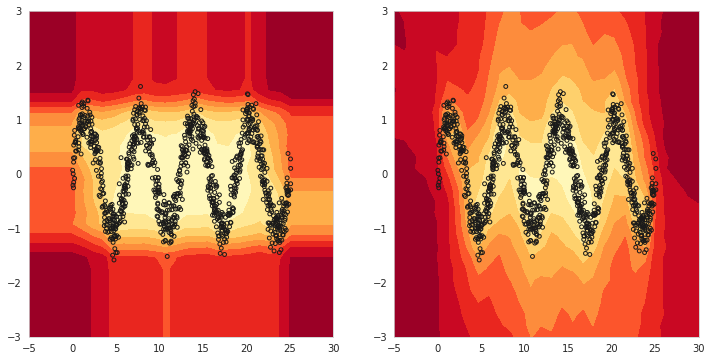

In [36]:
f = plt.figure(figsize=(12,6))

ax1 = f.add_subplot(121)
levels = np.linspace(np.min(S0),np.max(S0),10)
CS = ax1.contourf(xx, yy, S0, levels, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')


ax2 = f.add_subplot(122)
levels = np.linspace(np.min(S1),np.max(S1),10)
CS = ax2.contourf(xx, yy, S1, levels, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')


plt.show()